## Hot Ball of Money Monitor

The Hot Ball of Money Monitor is used to track the relative performance of an asset universe over a 7-day, 1-month, 3-month and 6-month time horizon

In [1]:
from messari.messari import Messari
from hotballofmoney import returns_df, hot_ball_of_money

### Asset Universe Broken Down by Sector

In [2]:
smart_contract_platforms = ['ETH', 'SOL', 'LUNA', 'AVAX', 'ATOM', 'NEAR', 'FTM']
dexs = ['UNI', 'CRV', 'LRC', 'SUSHI']
defi_2_0 = ['ALCX', 'SPELL', 'TOKE', 'OHM', 'FXS', 'CVX']
lending = ['AAVE', 'MKR', 'COMP', 'ANC', 'XVS']
data_management = ['GRT', 'BAND', 'API3']
storage = ['FIL', 'AR', 'SC', 'STORJ']
gaming = ['AXS', 'SAND', 'CHZ', 'ENJ', 'YGG', 'ILV', 'MANA', 'RARI', 'SLP']    
asset_universe = smart_contract_platforms + dexs + lending + data_management + storage + gaming + defi_2_0

### Collect Price Data 

In [6]:
m = Messari('f8783744-faf2-475e-8675-b3769cd55c81')
start = '2020-01-01'
end = '2022-02-22'
prices = m.get_metric_timeseries(asset_universe, 'price', start, end)
prices = prices.xs('close', axis=1, level=1)
prices.tail()

,ETH,SOL,LUNA,AVAX,ATOM,NEAR,FTM,UNI,CRV,LRC,...,ILV,MANA,RARI,SLP,ALCX,SPELL,TOKE,OHM,FXS,CVX
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-18,2780.609698,89.916213,50.632990,83.723148,26.863772,10.277304,1.863588,10.164302,2.807146,0.872501,...,588.673589,2.967785,7.843773,0.023729,144.988840,0.005162,33.741695,64.031439,26.186538,26.153805
2022-02-19,2764.697574,91.309327,50.485939,85.056641,26.689188,10.047597,1.874696,10.030492,2.802119,0.887835,...,578.969939,2.888743,7.913803,0.024431,136.493585,0.005101,32.754977,58.049333,23.019744,25.453164
2022-02-20,2622.901573,90.750352,49.353414,77.386984,26.089782,9.296586,1.725876,9.354851,2.549792,0.811928,...,550.228097,2.694755,7.247882,0.020226,137.849129,0.004656,30.970071,56.245397,21.093363,23.227203
2022-02-21,2569.868707,83.004779,50.163793,70.082433,23.836024,8.551867,1.539746,8.530585,2.339362,0.742272,...,532.172222,2.484000,7.270405,0.018316,132.183860,0.004527,29.990925,54.476169,19.252952,21.496585
2022-02-22,2603.906802,84.952835,53.278318,72.589594,24.383805,8.693083,1.571233,8.772786,2.360664,0.789034,...,539.368619,2.554096,6.742781,0.017911,132.272265,0.004584,30.540574,53.581404,19.099275,20.845523


### Compute cumulative Returns

Now that we have a price timeseries for each asset in the asset universe, we need to compute the cumulative returns for each time horizon. The simple cumulative daily return is calculated by taking the cumulative product of the daily percentage change. This calculation is represented by the following equation:

$$
i_t = (1 + r_t) * i_{t-1}, i_0 = 1
$$

This is calculated succinctly using the **return_df** function

In [7]:
asset_returns = returns_df(prices)
asset_returns.head()

,7-day Return 2022-02-15 - 2022-02-22,1-month Return 2022-01-23 - 2022-02-22,3-month Return 2021-11-24 - 2022-02-22,6-month Return 2021-08-26 - 2022-02-22
ETH,-18.265667,2.463850,-39.043432,-15.845465
SOL,-19.541168,-14.905220,-58.720400,13.455453
LUNA,-6.301930,-23.683265,38.129219,97.470315
AVAX,-21.980698,11.917434,-37.024986,75.606466
ATOM,-15.902792,-29.592224,-17.725089,35.998020


Lastly, we need to define a sector mapping dictionary to compute the average sector returns

In [8]:
# Sector mapping to compute sector returns
sector_mapping = {'ETH': 'Smart Contract Platform',
                  'SOL': 'Smart Contract Platform',
                  'LUNA': 'Smart Contract Platform',
                  'AVAX': 'Smart Contract Platform',
                  'DOT': 'Smart Contract Platform',
                  'ATOM': 'Smart Contract Platform',
                  'NEAR': 'Smart Contract Platform',
                  'FTM': 'Smart Contract Platform',
                  'ONE': 'Smart Contract Platform',
                  'UNI': 'DEX',
                  'CAKE': 'DEX',
                  'RUNE': 'DEX',
                  'CRV': 'DEX',
                  'LRC': 'DEX',
                  'SUSHI': 'DEX',
                  'ALCX': 'DeFi2.0',
                  'SPELL': 'DeFi2.0',
                  'TOKE': 'DeFi2.0',
                  'OHM': 'DeFi2.0',
                  'FXS': 'DeFi2.0',
                  'CVX': 'DeFi2.0',
                  'AAVE': 'Lending',
                  'MKR': 'Lending',
                  'COMP': 'Lending',
                  'ANC': 'Lending',
                  'XVS': 'Lending',
                  'LINK': 'Data Management',
                  'GRT': 'Data Management',
                  'BAND': 'Data Management',
                  'API3': 'Data Management',
                  'RAD': 'Data Management',
                  'FIL': 'File Storage',
                  'AR': 'File Storage',
                  'SC': 'File Storage',
                  'STORJ': 'File Storage',
                  'AXS': 'Gaming',
                  'SAND': 'Gaming',
                  'CHZ': 'Gaming',
                  'ENJ': 'Gaming',
                  'YGG': 'Gaming',
                  'ILV': 'Gaming',
                  'MANA': 'Gaming',
                  'RARI': 'Gaming',
                  'SLP': 'Gaming'}

### Hot Ball of Money Monitooooooooooor

The last step is to pass the returns dataframe and the sector mapping dictionary to the **hot_ball_of_money** function to generated the monitor

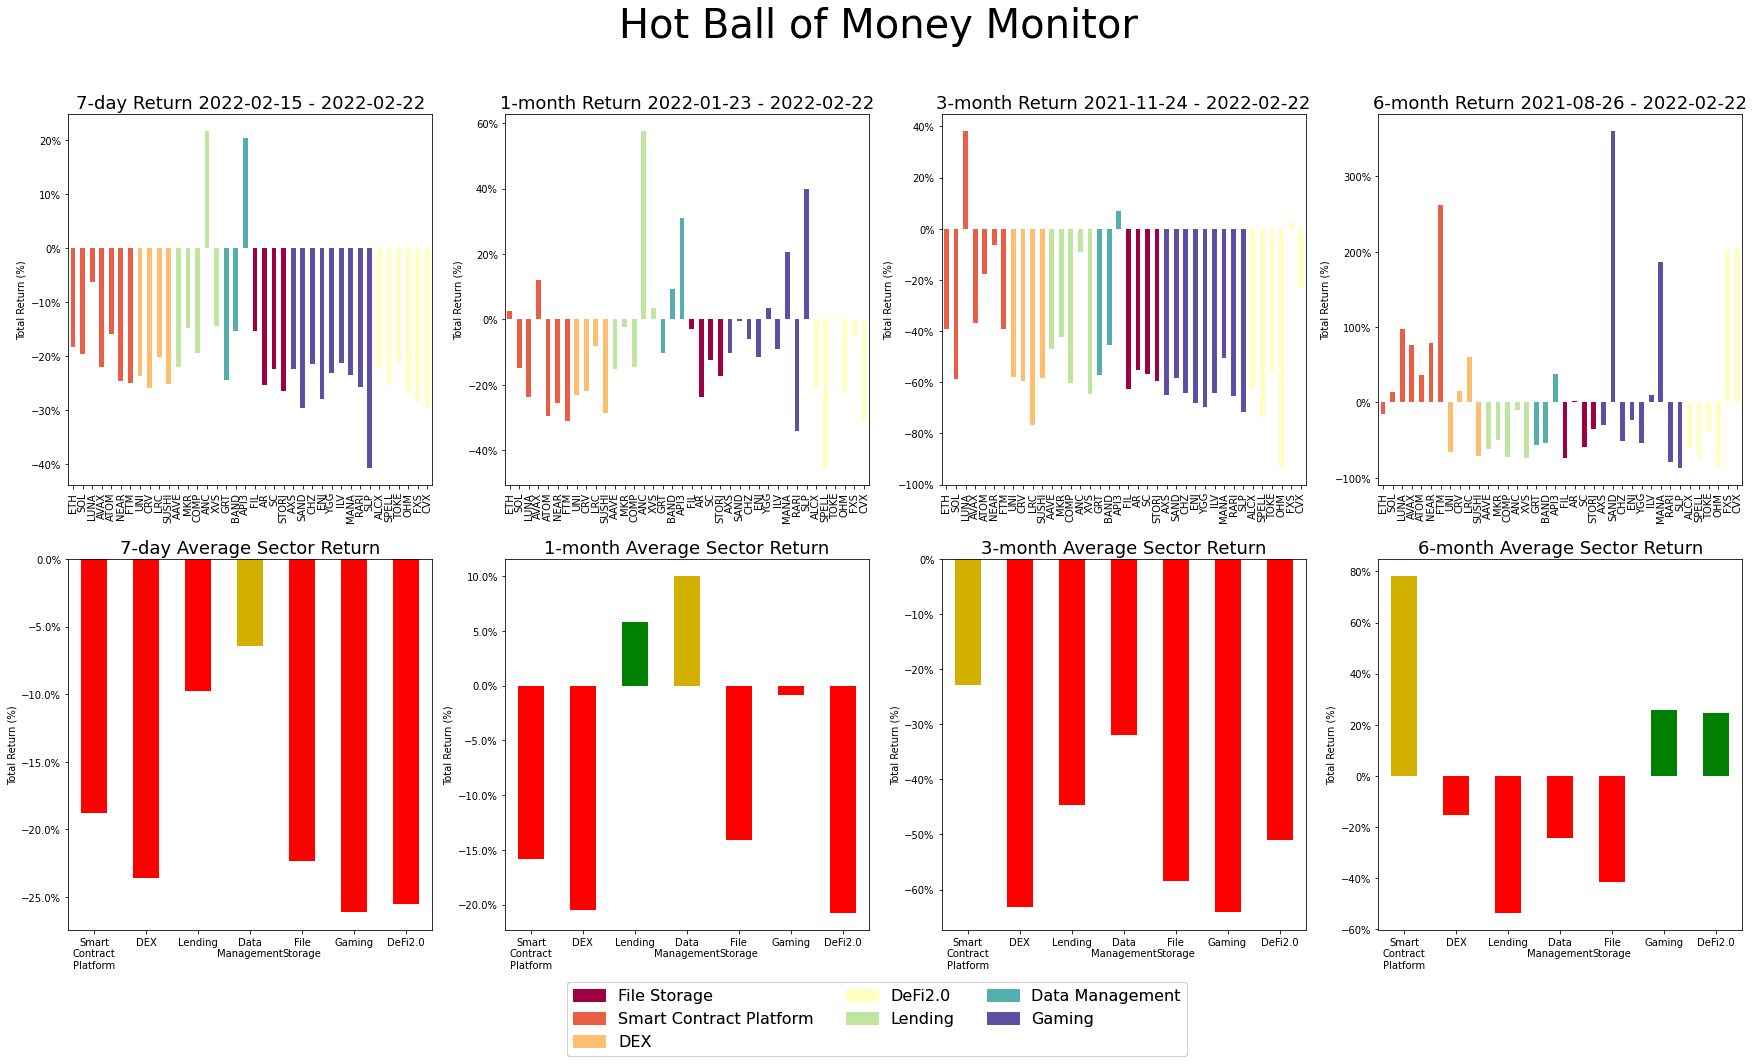

In [9]:
hot_ball_of_money(asset_returns, sector_mapping)